# gaussian distribution, normal distribution
我們要先來回憶常態分佈 <br>

機率密度函數probability density function (pdf)
$$
f(x) = \frac{1}{ \sigma \sqrt{2 \pi}} \exp \Big ( -\frac{1}{2} (\frac{x-\mu}{\sigma})^2 \Big )
$$
其中的 $\mu$ 是 mean ， $\sigma$ 是 standard deviation。 


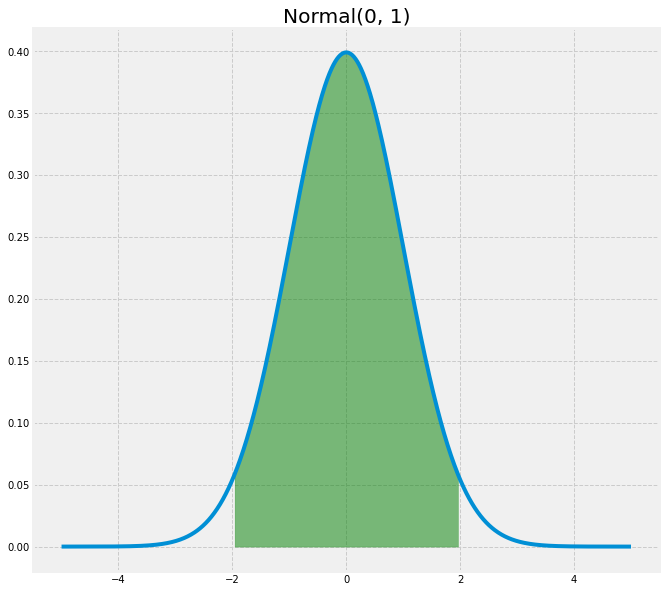

In [2]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]


mu, sigma = 0, 1
xlim = [mu - 5 * sigma, mu + 5 * sigma]
x = np.linspace(xlim[0], xlim[1], 1000)
y = norm.pdf(x, mu, sigma)

plt.plot(x, y)
plt.style.use('fivethirtyeight') # 538 style

# patch the area of confidence interval
conf = 0.95
ci = norm.ppf([(1-conf)/2, (1+conf)/2]) # inverse CDF　function
x_ci = np.linspace(ci[0], ci[1], 1000)
y_ci = norm.pdf(x_ci, mu, sigma)

plt.fill_between(x_ci, y_ci, 0, color = 'g', alpha = 0.5)
plt.grid(True, linestyle='--', which='major')
plt.title('Normal({}, {})'.format(mu, sigma))
plt.show()

# Bayesian Regression

我們已經很熟悉 Linear Regression 了，我們用比較不精確的方法解釋 Bayesian Regression。

$$
\min_w \sum_i \| y_i -N(f_w(x_i), \sigma^2) \|_2^2
$$



In [3]:
# Bayesian Regression
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error


X, y = datasets.load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87)

# 準備 Bayesian 模型
regression = linear_model.BayesianRidge()

regression.fit(X_train, y_train)
y_pred = regression.predict(X_test)

print('w 係數：', regression.coef_)
print('w_0 截距：', regression.intercept_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

w 係數： [   2.16582075 -247.78369781  520.10958086  253.39789498 -125.2248272
   -6.0410042  -232.6081987    42.13474179  530.09459698   38.16938876]
w_0 截距： 153.32718137738647
Mean squared error: 2844.44


In [5]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error


X, y = datasets.load_diabetes(return_X_y=True)

# poly feature
poly = PolynomialFeatures(degree=2)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87)

regression = linear_model.BayesianRidge()

regression.fit(X_train, y_train)
y_pred = regression.predict(X_test)

#print('w 係數：', regression.coef_)
print('w_0 截距：', regression.intercept_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))




w_0 截距： 151.56624009234773
Mean squared error: 2794.53


# Automatic Relevance Determination(ARD)

前面提到 Bayesian Regression 的 $\sigma$ 都是相同的，
我們很自然還有另外一個想法，能不能不同 wight $w_i$ 自動去選不同的 $\sigma_i$，答案是可以的。


In [6]:
# ARD Regression
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error


X, y = datasets.load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87)

# 準備 ARD 模型
regression = linear_model.ARDRegression()

regression.fit(X_train, y_train)
y_pred = regression.predict(X_test)

print('w 係數：', regression.coef_)
print('w_0 截距：', regression.intercept_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))


w 係數： [-3.72973982e-05 -2.30214540e+02  5.48261387e+02  2.36835732e+02
 -8.34351537e+01 -8.48081960e-04 -2.48097249e+02 -1.49265955e-04
  5.51784752e+02  6.06502550e-04]
w_0 截距： 153.3350806878627
Mean squared error: 2903.83


In [7]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error


X, y = datasets.load_diabetes(return_X_y=True)

# poly feature
poly = PolynomialFeatures(degree=2)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87)

regression = linear_model.ARDRegression()

regression.fit(X_train, y_train)
y_pred = regression.predict(X_test)

#print('w 係數：', regression.coef_)
print('w_0 截距：', regression.intercept_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))


w_0 截距： 148.4294692255447
Mean squared error: 3019.86
